In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data,io
from math import floor,ceil
from skimage.feature import greycomatrix,greycoprops
from skimage.color import rgb2gray

import get_glcm

In [3]:
image_path = "full.tif"
image = io.imread(image_path)
image = rgb2gray(image)

<class 'numpy.ndarray'>
(1281, 2336)
0.9896568627450981
0.0


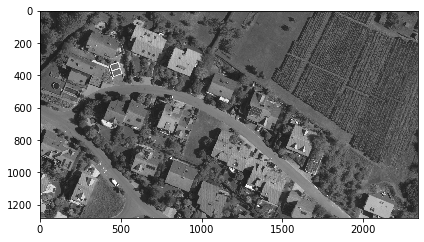

In [5]:
print(type(image))
print(image.shape)
print(image.max())
print(image.min())
io.imshow(image)

In [33]:
# normalization for image
image = np.uint8(255.*(image-np.min(image))/(np.max(image)-np.min(image)))
h,w = image.shape[0:2]
print(image.max())
print(image.min())
# set the hyperparameters
nbit = 64 # gray level
# the mininum and the maximum gray level
min_ = 0
max_ = 255
slide_window = 7# slide window
# step & angle 
step = [2]
angle = [0]
# calculate the GLCM
# glcm: [nbit,nbit,len(step),len(angle),h,w], usually the len(step) and len(angle) is 1.
glcm = get_glcm.calcu_glcm(image,min_,max_,nbit,slide_window,step,angle)
# calculate the feature
for i in range(glcm.shape[2]):
    for j in range(glcm.shape[3]):
        # glcm_slice: [nbit,nbit,h,w] 
        glcm_slice = glcm[:,:,i,j,:,:]
        mean = get_glcm.calcu_glcm_mean(glcm_slice,nbit)
        variance = get_glcm.calcu_glcm_variance(glcm_slice,nbit)
        homogeneity = get_glcm.calcu_glcm_homogeneity(glcm_slice,nbit)
        contrast = get_glcm.calcu_glcm_contrast(glcm_slice,nbit)
        dissimilarity = get_glcm.calcu_glcm_dissimilarity(glcm_slice,nbit)
        entropy = get_glcm.calcu_glcm_entropy(glcm_slice,nbit)
        energy = get_glcm.calcu_glcm_energy(glcm_slice,nbit)
        correlation = get_glcm.calcu_glcm_correlation(glcm_slice,nbit)
        auto_correlation = get_glcm.calcu_glcm_auto_correlation(glcm_slice,nbit)
# check glcm_slice
co_mat = glcm_slice[:,:,1,1]
print(co_mat.sum())        

255
0
15


In [ ]:
font = {"family":"Times New Roman",
        "weight":"normal",
        "size":20,}

Text(0.5, 1.0, 'Original')

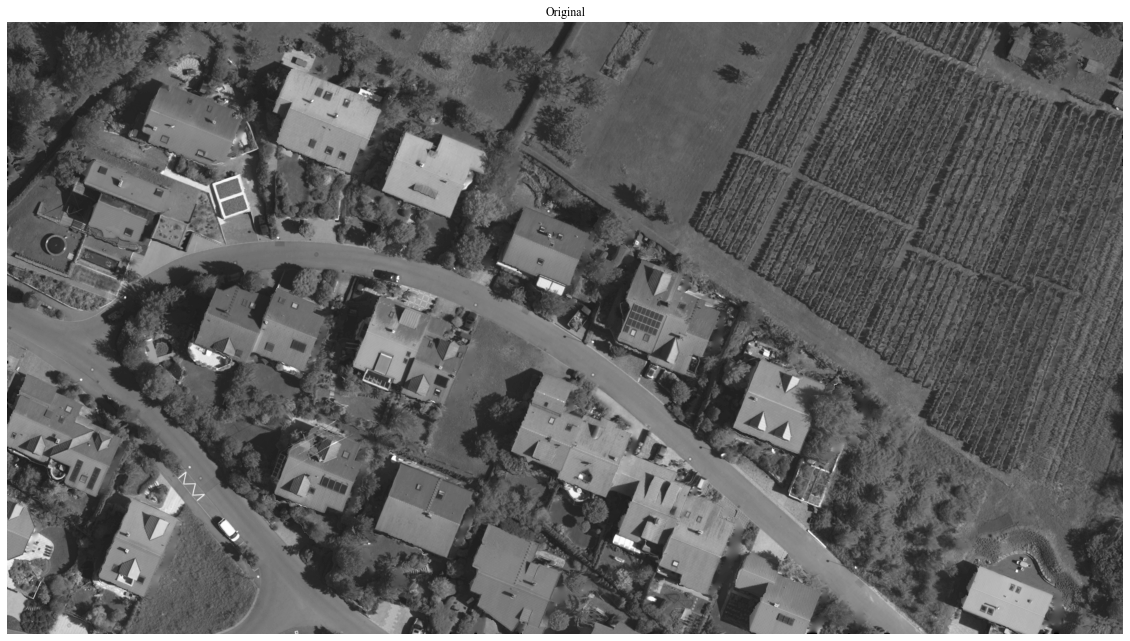

In [19]:
plt.figure("Original",figsize=(20,20))
plt.axis("off")
plt.imshow(image,cmap="gray")
plt.title("Original",font)

Text(0.5, 1.0, 'Mean')

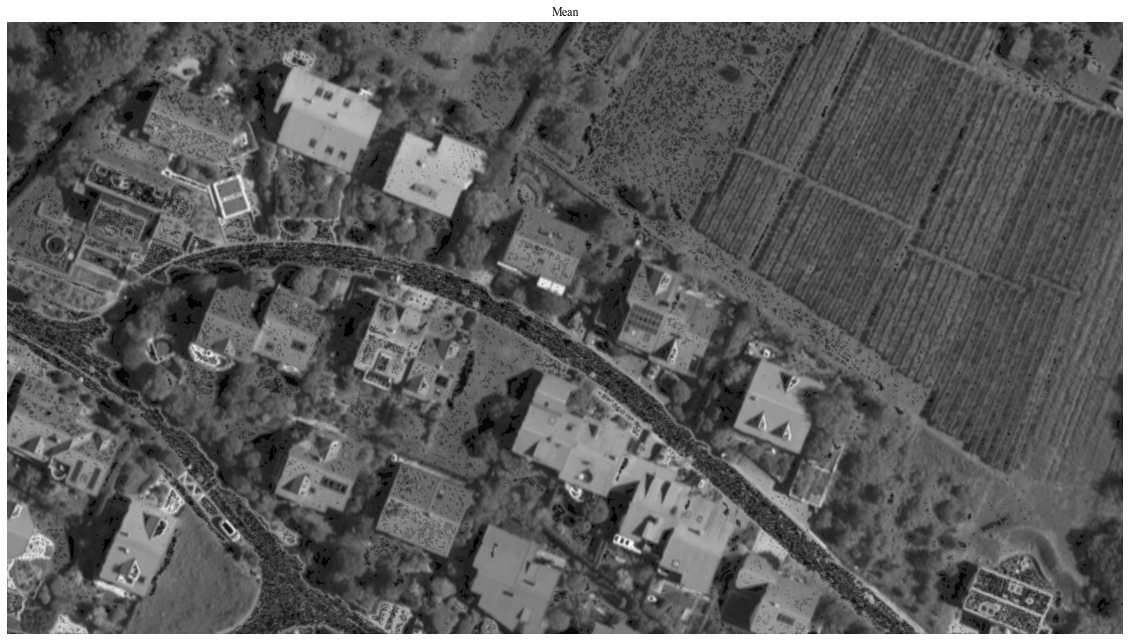

In [17]:
plt.figure("Mean",figsize=(20,20))
plt.axis("off")
plt.imshow(mean,cmap="gray")
plt.title("Mean",font)

Text(0.5, 1.0, 'Variance')

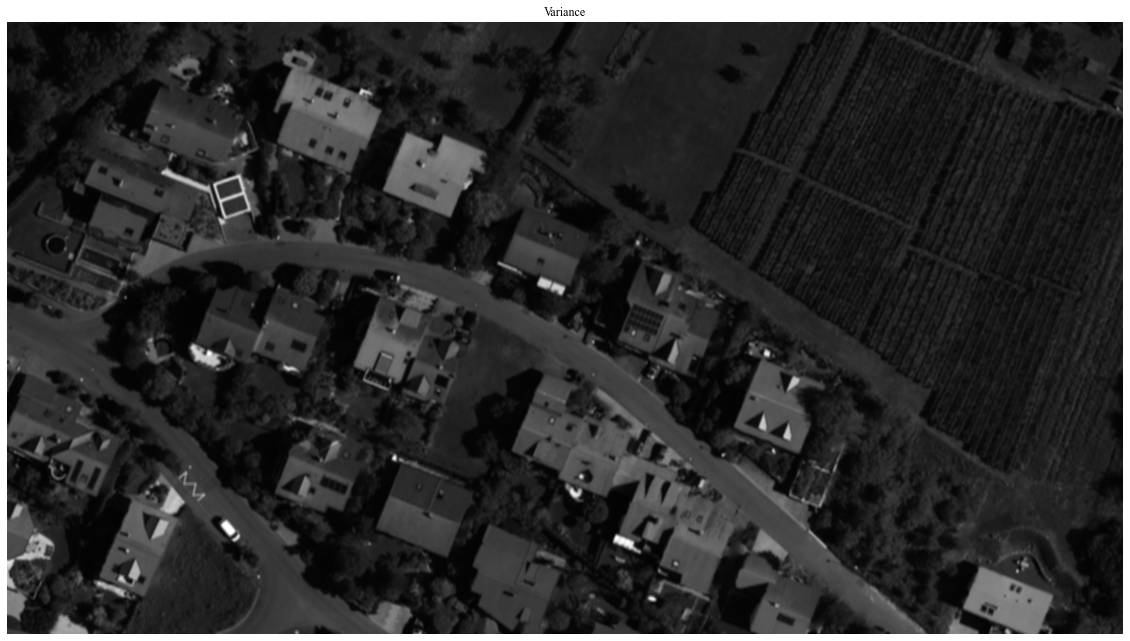

In [18]:
plt.figure("Variance",figsize=(20,20))
plt.axis("off")
plt.imshow(variance,cmap="gray")
plt.title("Variance",font)

Text(0.5, 1.0, 'Homogeneity')

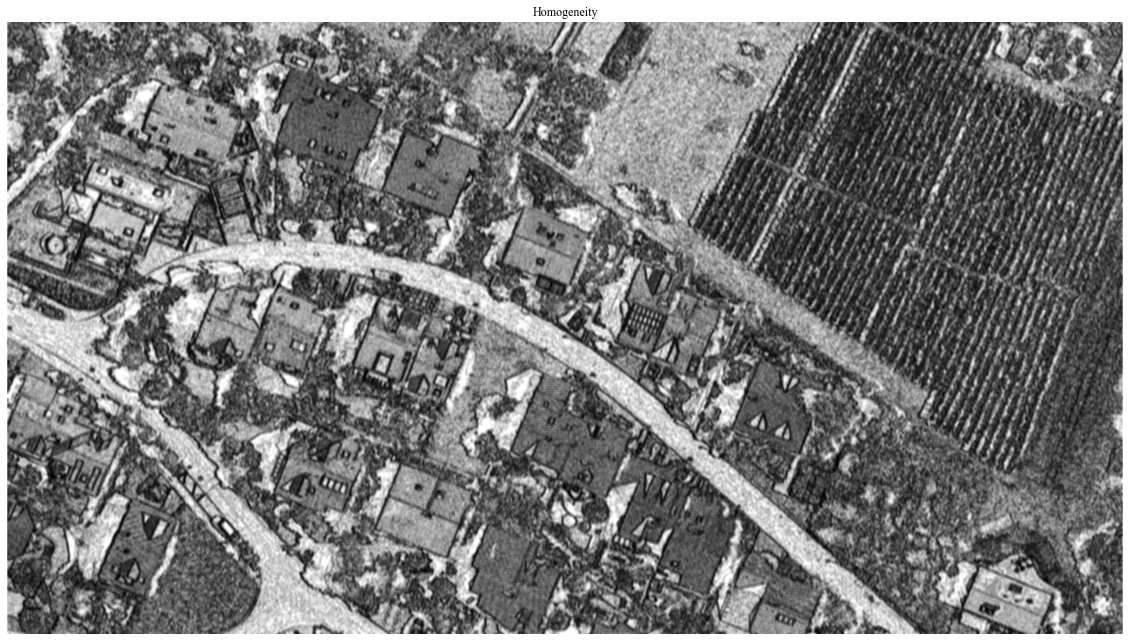

In [20]:
plt.figure("Homogeneity",figsize=(20,20))
plt.axis("off")
plt.imshow(homogeneity,cmap="gray")
plt.title("Homogeneity",font)

Text(0.5, 1.0, 'Contrast')

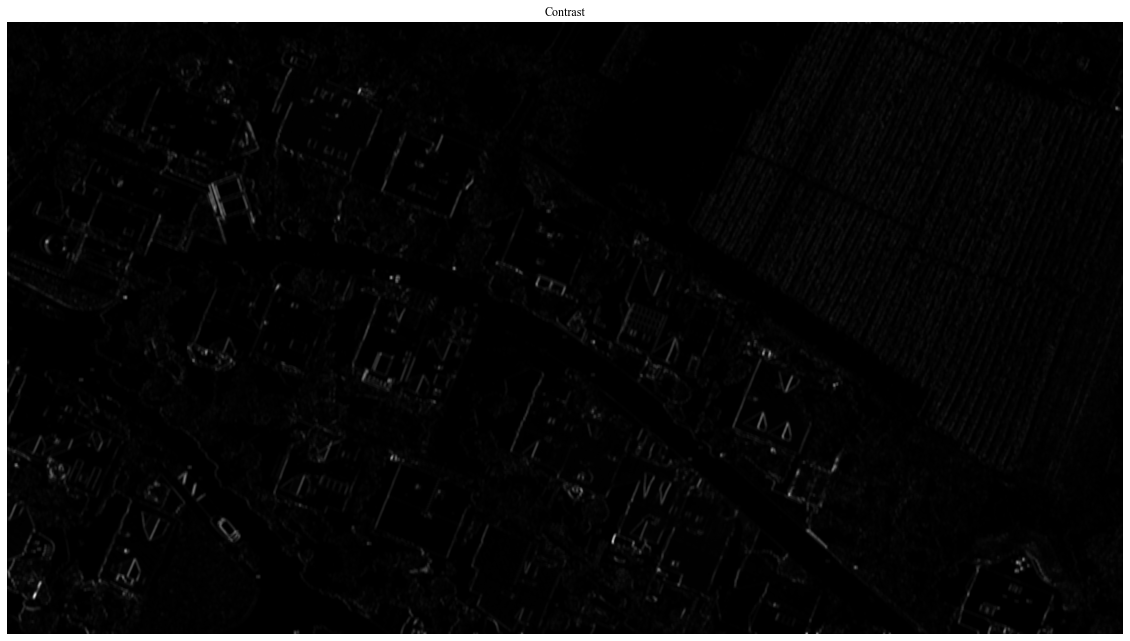

In [21]:
plt.figure("Contrast",figsize=(20,20))
plt.axis("off")
plt.imshow(contrast,cmap="gray")
plt.title("Contrast",font)

Text(0.5, 1.0, 'Dissimilarity')

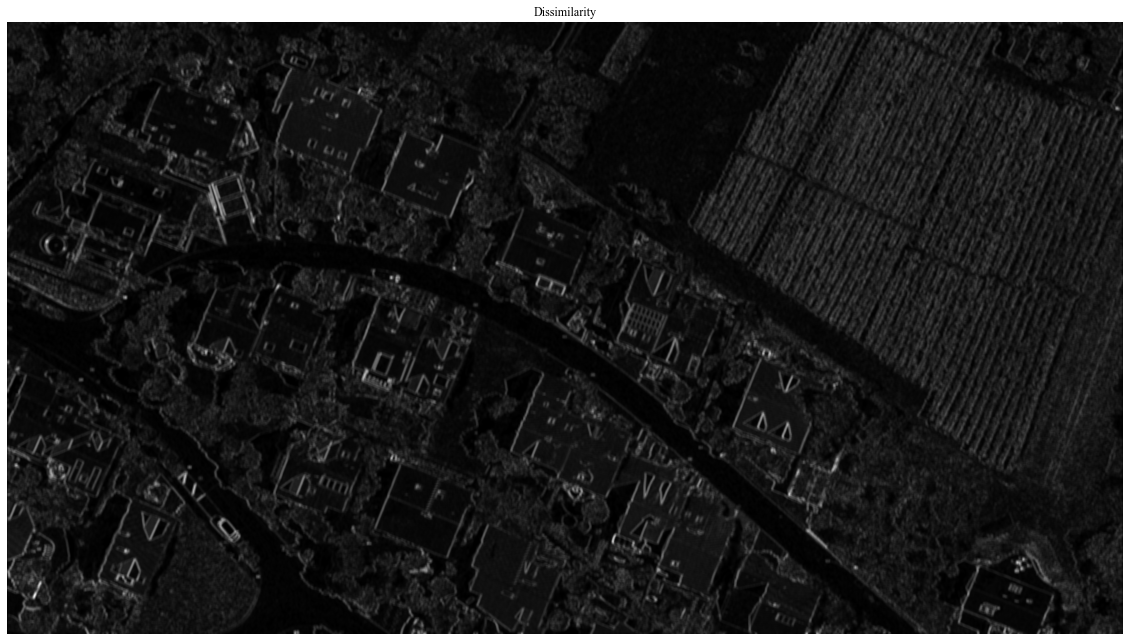

In [22]:
plt.figure("Dissimilarity",figsize=(20,20))
plt.axis("off")
plt.imshow(dissimilarity,cmap="gray")
plt.title("Dissimilarity",font)

Text(0.5, 1.0, 'Entropy')

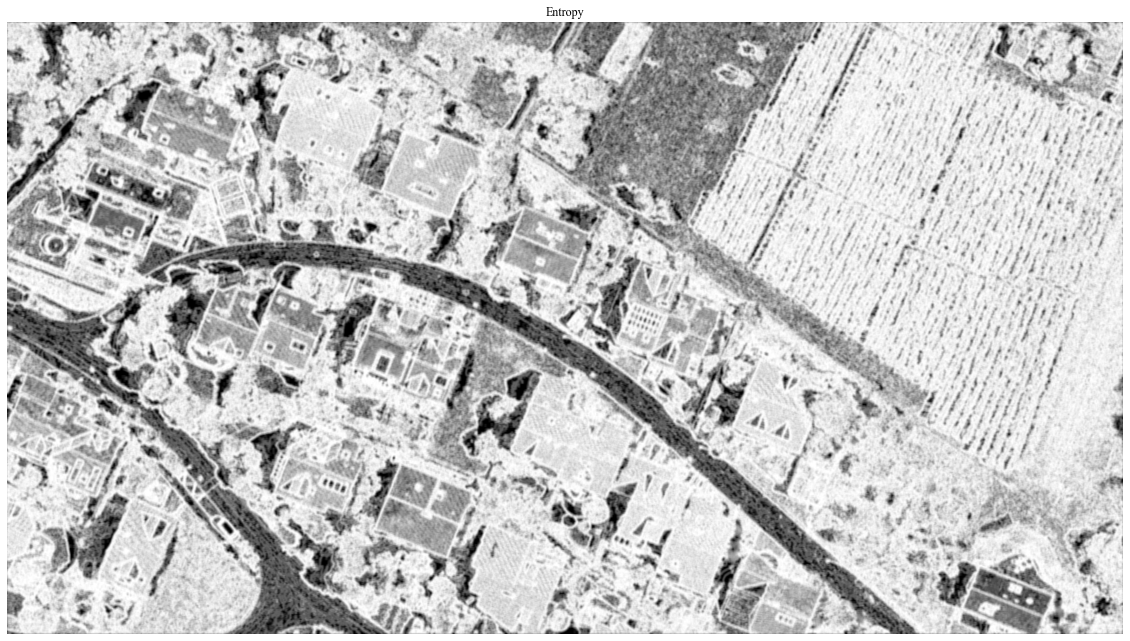

In [23]:
plt.figure("Entropy",figsize=(20,20))
plt.axis("off")
plt.imshow(entropy,cmap="gray")
plt.title("Entropy",font)

Text(0.5, 1.0, 'Energy')

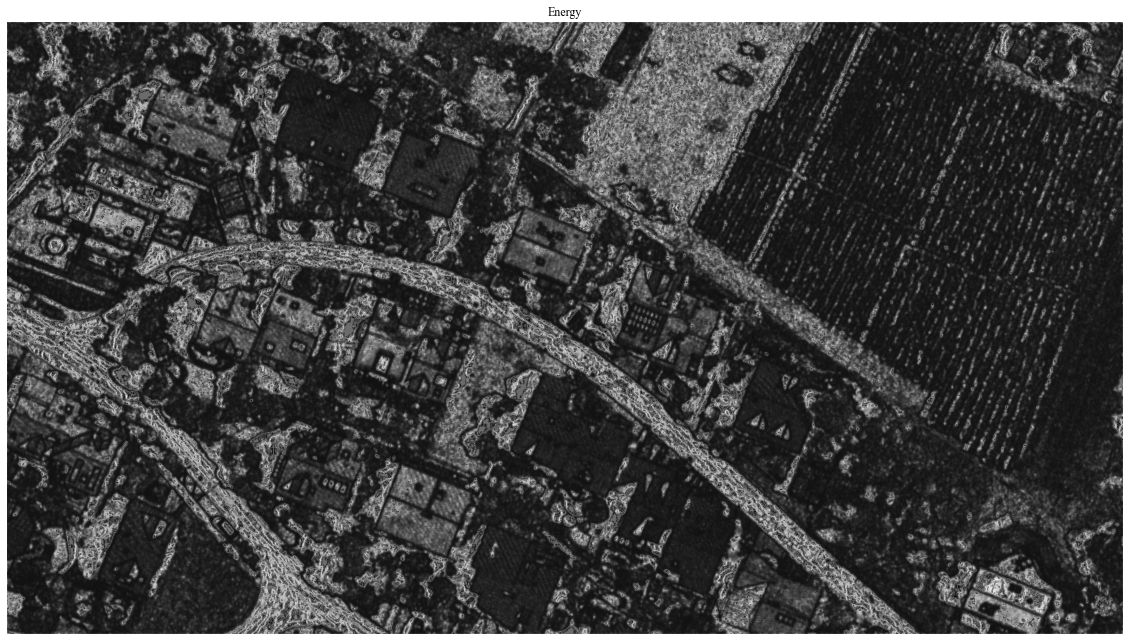

In [24]:
plt.figure("Energy",figsize=(20,20))
plt.axis("off")
plt.imshow(energy,cmap="gray")
plt.title("Energy",font)

Text(0.5, 1.0, 'Correlation')

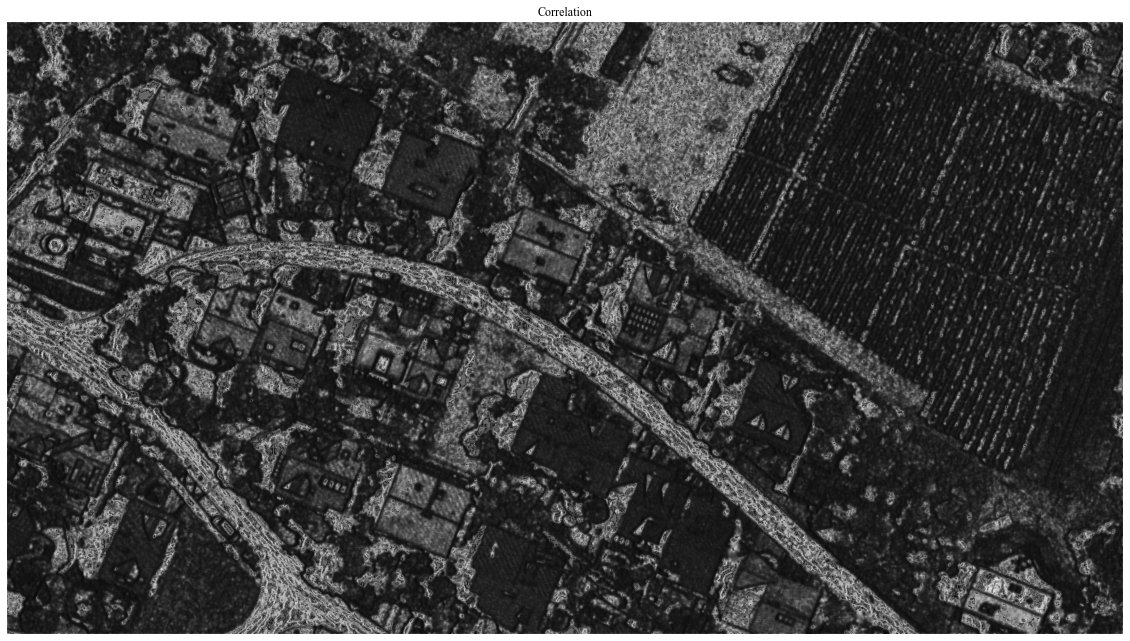

In [25]:
plt.figure("Correlation",figsize=(20,20))
plt.axis("off")
plt.imshow(correlation,cmap="gray")
plt.title("Correlation",font)

Text(0.5, 1.0, 'Auto_correlation')

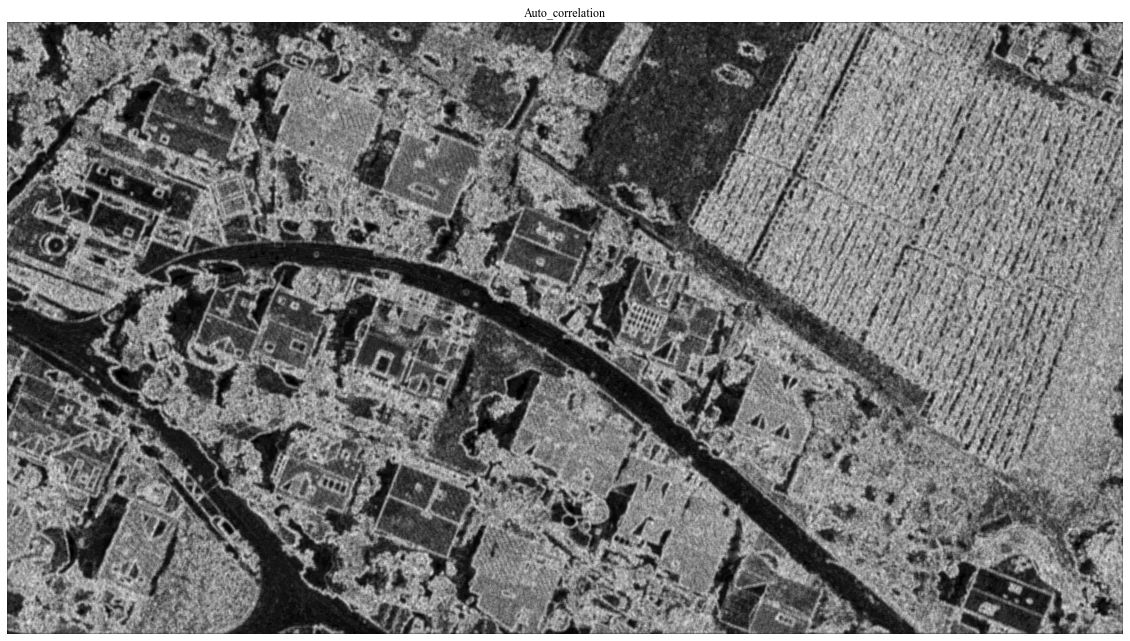

In [26]:
plt.figure("Auto_correlation",figsize=(20,20))
plt.axis("off")
plt.imshow(auto_correlation,cmap="gray")
plt.title("Auto_correlation",font)